Part 1.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Load dataset (assuming you have it as a CSV file)
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Housing.csv')

# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example: one-hot encoding)
df_encoded = pd.get_dummies(df, columns=non_numeric_cols)

# Separate features and target
X = df_encoded.drop('price', axis=1).values
y = df_encoded['price'].values

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Create a TensorDataset and split it
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(X.shape[1], 32)
        self.relu = nn.ReLU()
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Initialize the model, loss function and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [17]:
# Training the model
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


Epoch 50/500, Train Loss: 0.0049, Validation Loss: 0.0124
Epoch 100/500, Train Loss: 0.0027, Validation Loss: 0.0170
Epoch 150/500, Train Loss: 0.0019, Validation Loss: 0.0157
Epoch 200/500, Train Loss: 0.0015, Validation Loss: 0.0153
Epoch 250/500, Train Loss: 0.0017, Validation Loss: 0.0166
Epoch 300/500, Train Loss: 0.0015, Validation Loss: 0.0168
Epoch 350/500, Train Loss: 0.0016, Validation Loss: 0.0161
Epoch 400/500, Train Loss: 0.0015, Validation Loss: 0.0158
Epoch 450/500, Train Loss: 0.0010, Validation Loss: 0.0158
Epoch 500/500, Train Loss: 0.0014, Validation Loss: 0.0168


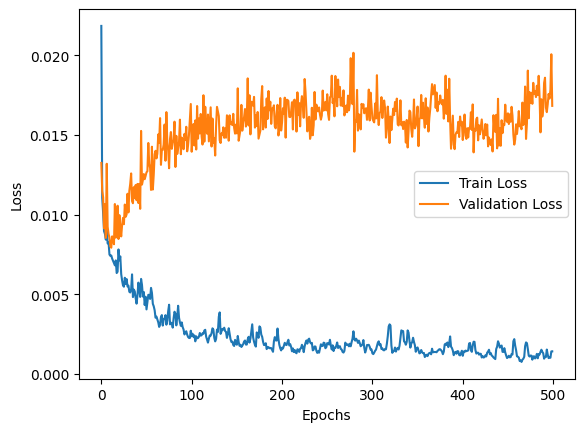

Neural Network Train Loss: 0.0014, Validation Loss: 0.0168


In [18]:
# Plotting training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compare with linear regression
print(f'Neural Network Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

In [19]:
# Calculate the number of trainable parameters in the neural network
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([p.numel() for p in model_parameters])
print(f'Trainable parameters in the neural network: {params}')

# For linear regression
n_features = X.shape[1]
linear_params = n_features + 1  # n weights + 1 bias
print(f'Trainable parameters in linear regression: {linear_params}')


Trainable parameters in the neural network: 3841
Trainable parameters in linear regression: 21


In [16]:
class ComplexNeuralNetwork(nn.Module):
    def __init__(self):
        super(ComplexNeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(X.shape[1], 32)
        self.hidden2 = nn.Linear(32, 64)
        self.hidden3 = nn.Linear(64, 16)
        self.relu = nn.ReLU()
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Initialize the model, loss function and optimizer
model = ComplexNeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [14]:
# Training the model
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


Epoch 50/500, Train Loss: 0.0008, Validation Loss: 0.0142
Epoch 100/500, Train Loss: 0.0011, Validation Loss: 0.0163
Epoch 150/500, Train Loss: 0.0005, Validation Loss: 0.0168
Epoch 200/500, Train Loss: 0.0010, Validation Loss: 0.0179
Epoch 250/500, Train Loss: 0.0019, Validation Loss: 0.0144
Epoch 300/500, Train Loss: 0.0005, Validation Loss: 0.0180
Epoch 350/500, Train Loss: 0.0004, Validation Loss: 0.0164
Epoch 400/500, Train Loss: 0.0019, Validation Loss: 0.0144
Epoch 450/500, Train Loss: 0.0007, Validation Loss: 0.0182
Epoch 500/500, Train Loss: 0.0007, Validation Loss: 0.0170


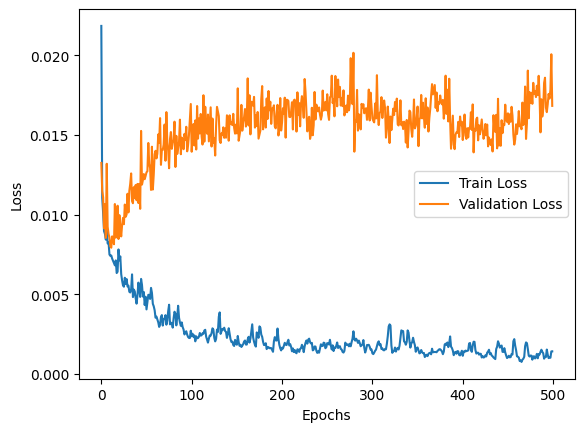

Complex Neural Network Train Loss: 0.0014, Validation Loss: 0.0168


In [20]:

# Plotting training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compare with linear regression and simpler neural network
print(f'Complex Neural Network Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


In [21]:
# Calculate the number of trainable parameters in the complex neural network
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([p.numel() for p in model_parameters])
print(f'Trainable parameters in the complex neural network: {params}')

# For linear regression
n_features = X.shape[1]
linear_params = n_features + 1  # n weights + 1 bias
print(f'Trainable parameters in linear regression: {linear_params}')


Trainable parameters in the complex neural network: 3841
Trainable parameters in linear regression: 21


Part 2.

In [23]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 3 * 32 * 32  # CIFAR-10 images are 32x32x3
hidden_size = 512
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# CIFAR-10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 170498071/170498071 [00:02<00:00, 61630360.69it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [24]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = x.view(-1, input_size)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = FullyConnectedNN(input_size, hidden_size, num_classes).to(device)


In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [38]:
# Train the model
total_step = len(train_loader)
training_start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {running_loss/total_step:.4f}')

training_end_time = time.time()
training_time = training_end_time - training_start_time
print(f'Training Time: {training_time:.2f} seconds')


Epoch [1/10], Step [100/500], Loss: 0.2335
Epoch [1/10], Step [200/500], Loss: 0.0071
Epoch [1/10], Step [300/500], Loss: 0.0181
Epoch [1/10], Step [400/500], Loss: 0.0003
Epoch [1/10], Step [500/500], Loss: 0.1390
Epoch [1/10], Average Loss: 0.0668
Epoch [2/10], Step [100/500], Loss: 0.1123
Epoch [2/10], Step [200/500], Loss: 0.1118
Epoch [2/10], Step [300/500], Loss: 0.0204
Epoch [2/10], Step [400/500], Loss: 0.0707
Epoch [2/10], Step [500/500], Loss: 0.1131
Epoch [2/10], Average Loss: 0.0711
Epoch [3/10], Step [100/500], Loss: 0.1188
Epoch [3/10], Step [200/500], Loss: 0.0462
Epoch [3/10], Step [300/500], Loss: 0.0148
Epoch [3/10], Step [400/500], Loss: 0.0249
Epoch [3/10], Step [500/500], Loss: 0.0287
Epoch [3/10], Average Loss: 0.0646
Epoch [4/10], Step [100/500], Loss: 0.0000
Epoch [4/10], Step [200/500], Loss: 0.0017
Epoch [4/10], Step [300/500], Loss: 0.3807
Epoch [4/10], Step [400/500], Loss: 0.0545
Epoch [4/10], Step [500/500], Loss: 0.2540
Epoch [4/10], Average Loss: 0.0774


In [27]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the 10000 test images: {accuracy:.2f}%')


Accuracy of the model on the 10000 test images: 52.70%


In [28]:
class ExtendedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ExtendedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = x.view(-1, input_size)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

hidden_sizes = [512, 256, 128]
model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)


In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
# Train the model
total_step = len(train_loader)
training_start_time = time.time()
losses = []

for epoch in range(300):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    average_loss = running_loss / total_step
    losses.append(average_loss)

    print(f'Epoch [{epoch+1}/300], Average Loss: {average_loss:.4f}')

training_end_time = time.time()
training_time = training_end_time - training_start_time
print(f'Training Time: {training_time:.2f} seconds')


Epoch [1/300], Average Loss: 0.1081
Epoch [2/300], Average Loss: 0.1207
Epoch [3/300], Average Loss: 0.1079
Epoch [4/300], Average Loss: 0.1130
Epoch [5/300], Average Loss: 0.1207
Epoch [6/300], Average Loss: 0.1082
Epoch [7/300], Average Loss: 0.0878
Epoch [8/300], Average Loss: 0.1401
Epoch [9/300], Average Loss: 0.0922
Epoch [10/300], Average Loss: 0.1038
Epoch [11/300], Average Loss: 0.1047
Epoch [12/300], Average Loss: 0.1004
Epoch [13/300], Average Loss: 0.1020
Epoch [14/300], Average Loss: 0.1110
Epoch [15/300], Average Loss: 0.1024
Epoch [16/300], Average Loss: 0.1176
Epoch [17/300], Average Loss: 0.0912
Epoch [18/300], Average Loss: 0.1038
Epoch [19/300], Average Loss: 0.0928
Epoch [20/300], Average Loss: 0.0964
Epoch [21/300], Average Loss: 0.1096
Epoch [22/300], Average Loss: 0.0984
Epoch [23/300], Average Loss: 0.0940
Epoch [24/300], Average Loss: 0.0922
Epoch [25/300], Average Loss: 0.0926
Epoch [26/300], Average Loss: 0.1002
Epoch [27/300], Average Loss: 0.0894
Epoch [28/

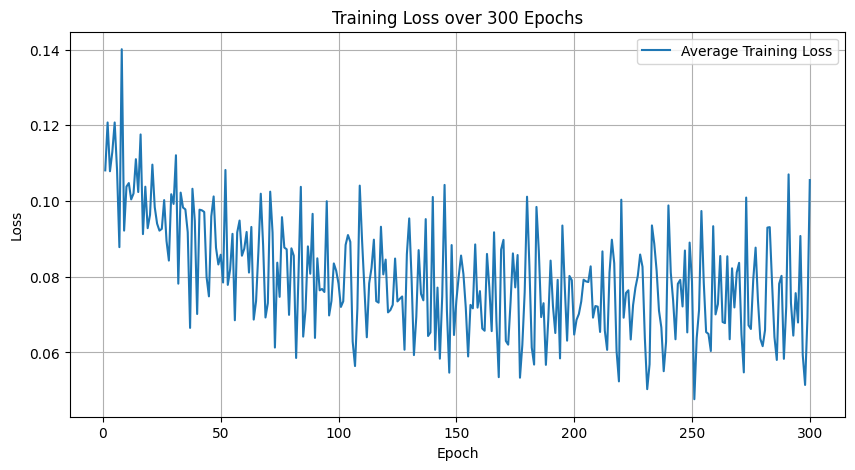

In [36]:
# Plot the average loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, 301), losses, label='Average Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over 300 Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the 10000 test images: {accuracy:.2f}%')


Accuracy of the model on the 10000 test images: 52.66%
